## Evaluating FastPitch + pretrained HiFi-GAN

Let's evaluate the quality of the FastPitch model generated so far using a HiFi-GAN model pre-trained on English.

In [16]:
import json
import nemo
import torch
import librosa
import numpy as np
import random

from pathlib import Path
from tqdm.notebook import tqdm

In [17]:
import IPython.display as ipd
from nemo.collections.tts.models import HifiGanModel, FastPitchModel
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

In [19]:
#Frase test usada en la evaluación de los modelos
# test="¡Miedo! ¡Que yo tengo miedo! -exclamó el mancebo con un repentino arrebato que le puso encendido como la grana-. ¿A dónde vas,"

In [20]:
# test = "das werden einmal \u00fcber eine million kleiner buchenpflanzen werden." # text input to the model
# test_id = "2b2b496ccc9b57130f559c4fd827825f" # identifier for the audio corresponding to the test text
# data_path = "data_thorsten_2210/ThorstenVoice-Dataset-22_10/ThorstenVoice-Dataset_2022.10/wavs/" # path to dataset folder with wav files from original dataset
# seed = 1234
# test = "A no contenerme la presencia de Inés, ni un instante habría yo permanecido en aquella situación. Después cuando vi al buen anciano precipitarse fuera de la casa"
# test_id = "19demarzo_3262" # identifier for the audio corresponding to the test text
# data_path = "/home/irene/datasets/datasetCastellanoReducido/19demarzo/" # path to dataset folder with wav files from original dataset 


#test = "El viento y el Sol discutían su poder sobre los hombres y decidieron establecer una apuesta entre ellos para ver quien retiraba la ropa de un hombre en menor tiempo.El viento comenzó en primer lugar sobre un monje que iba por el bosque y soplando con gran fuerza vio que no era suficiente, así que provoco un vendaval lo que hizo que el monje buscara un abrigo en la alforja de su mula para protegerse. Tras un rato el viento avergonzado desistió.El sol comenzó a brillar e inmediatamente el hombre se quitó el abrigo siguió incrementando su fuerza y al rato al monje no le quedó más remedio que desvestirse completamente para tomar un baño en el rio próximo."
# test = "El viento y el Sol discutían su poder sobre los hombres y decidieron establecer una apuesta entre ellos para ver quien retiraba la ropa de un hombre en menor tiempo. El viento comenzó en primer lugar sobre un monje que iba por el bosque y soplando con gran fuerza vio que no era suficiente, así que provocó un vendaval, lo que hizo que el monje buscara un abrigo en la alforja de su mula para protegerse."
# test_id = "19demarzo_3262" # identifier for the audio corresponding to the test text
# data_path = "/home/irene/datasets/datasetCastellanoReducido/19demarzo/" # path to dataset folder with wav files from original dataset

#############################Audios Profe Segovia######################################
# test = "A lo largo de la historia se han venido utilizando distintas tecnologías e instrumentos para transmitir información, para enseñar y para aprender:"
# test="A no contenerme la presencia de Inés, ni un instante habría yo permanecido en aquella situación. Después cuando vi al buen anciano precipitarse fuera de lacasa,|A no contenerme la presencia de Inés, ni un instante habría yo permanecido en aquella situación. Después cuando vi al buen anciano precipitarse fuera de casa,"
#Frase test usada en la evaluación de los modelos
test="¡Miedo! ¡Que yo tengo miedo! -exclamó el mancebo con un repentino arrebato que le puso encendido como la grana-. ¿A dónde vas,"
##ESMAPA152###
# test="¿Acaso estaban reñidas con las más pronunciadas curvas?"
# test_id = "resumen_asignatura_bueno1" # identifier for the audio corresponding to the test text
# test_id = "19demarzo_3262" # identifier for the audio corresponding to the test text
test_id = "19demarzo_3270" # identifier for the audio corresponding to the test text
# data_path = "/home/irene/datasets/datasetAlfonsoGutierrezFinetuning/asignaturaBueno/" # path to dataset folder with wav files from original dataset
# data_path = "/home/irene/datasets/datasetEsMapa152Finetuning/esmapa152/" # path to dataset folder with wav files from original dataset
data_path = "/home/irene/datasets/datasetCastellanoReducido/19demarzo/" # path to dataset folder with wav files from original dataset



In [21]:
def evaluate_spec_fastpitch_ckpt(spec_gen_model, v_model, test, speaker=None):
    seed = random.randint(100000, 999999)
#   print(seed)
    with torch.no_grad():
        torch.manual_seed(seed)
        torch.cuda.manual_seed(seed)
        torch.backends.cudnn.enabled = True
        torch.backends.cudnn.benchmark = False
        parsed = spec_gen_model.parse(str_input=test, normalize=True)
        if speaker == None:
            spectrogram = spec_gen_model.generate_spectrogram(tokens=parsed)
        else:
            spectrogram = spec_gen_model.generate_spectrogram(tokens=parsed, speaker=speaker)
        print(spectrogram.size())
        audio = v_model.convert_spectrogram_to_audio(spec=spectrogram)

    spectrogram = spectrogram.to('cpu').numpy()[0]
    audio = audio.to('cpu').numpy()[0]
    audio = audio / np.abs(audio).max()
    return audio, spectrogram

In [22]:
#Audios 19demarzo modelo entrenado desde 0.
# import glob, os
# lista = glob.glob("/home/irene/datasets/NemoSpanishTTS/resultSpanishTTS/FastPitch/2023-06-28_08*/checkpoints/*.ckpt")
# for le in sorted(lista, key=os.path.basename):
#     print(os.path.dirname(le),"\n\t",os.path.basename(le))
# print(sorted(lista, key=os.path.basename)[0])

#Audios profe Segovia con modelo finetuning
import glob, os
lista = glob.glob("/home/irene/datasets/NemoSpanishTTSFinetuning/resultSpanishTTS/FastPitch/2023-07-19_12-14-40/checkpoints/*.ckpt")
# lista = glob.glob("/home/irene/datasets/NemoSpanishTTSEsMapa152Finetuning/resultSpanishTTS/FastPitch/2023-08-04_13-29-05/checkpoints/*.ckpt")

for le in sorted(lista, key=os.path.basename):
    print(os.path.dirname(le),"\n\t",os.path.basename(le))
print(sorted(lista, key=os.path.basename)[0])

/home/irene/datasets/NemoSpanishTTSFinetuning/resultSpanishTTS/FastPitch/2023-07-19_12-14-40/checkpoints 
	 FastPitch--val_loss=1.3989-epoch=65.ckpt
/home/irene/datasets/NemoSpanishTTSFinetuning/resultSpanishTTS/FastPitch/2023-07-19_12-14-40/checkpoints 
	 FastPitch--val_loss=1.4101-epoch=87.ckpt
/home/irene/datasets/NemoSpanishTTSFinetuning/resultSpanishTTS/FastPitch/2023-07-19_12-14-40/checkpoints 
	 FastPitch--val_loss=1.4560-epoch=54.ckpt
/home/irene/datasets/NemoSpanishTTSFinetuning/resultSpanishTTS/FastPitch/2023-07-19_12-14-40/checkpoints 
	 FastPitch--val_loss=1.7625-epoch=691-last.ckpt
/home/irene/datasets/NemoSpanishTTSFinetuning/resultSpanishTTS/FastPitch/2023-07-19_12-14-40/checkpoints/FastPitch--val_loss=1.3989-epoch=65.ckpt


In [23]:
hfg_ngc = "tts_en_lj_hifigan_ft_mixerttsx" # NGC pretrained model name: https://catalog.ngc.nvidia.com/orgs/nvidia/teams/nemo/models/tts_en_lj_hifigan
vocoder_model = HifiGanModel.from_pretrained(hfg_ngc, strict=False).eval().cuda()

[NeMo I 2023-09-10 13:58:06 cloud:58] Found existing object /root/.cache/torch/NeMo/NeMo_1.19.0/tts_en_lj_hifigan_ft_mixerttsx/2286838f886ea3e82d0c3348b67e5035/tts_en_lj_hifigan_ft_mixerttsx.nemo.
[NeMo I 2023-09-10 13:58:06 cloud:64] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.19.0/tts_en_lj_hifigan_ft_mixerttsx/2286838f886ea3e82d0c3348b67e5035/tts_en_lj_hifigan_ft_mixerttsx.nemo
[NeMo I 2023-09-10 13:58:06 common:913] Instantiating model from pre-trained checkpoint


[NeMo W 2023-09-10 13:58:08 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: lj_train.json
      min_duration: 0.75
      n_segments: 8192
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 16
      num_workers: 1
    
[NeMo W 2023-09-10 13:58:08 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: lj_val.json
      min_duration: 3
      n_segments: 66048
    dataloader_params:
      drop_last: false


[NeMo I 2023-09-10 13:58:08 features:291] PADDING: 0
[NeMo I 2023-09-10 13:58:08 features:299] STFT using exact pad
[NeMo I 2023-09-10 13:58:08 features:291] PADDING: 0
[NeMo I 2023-09-10 13:58:08 features:299] STFT using exact pad
[NeMo I 2023-09-10 13:58:09 save_restore_connector:249] Model HifiGanModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.19.0/tts_en_lj_hifigan_ft_mixerttsx/2286838f886ea3e82d0c3348b67e5035/tts_en_lj_hifigan_ft_mixerttsx.nemo.


In [24]:
# FastPitchModel.list_available_models()

In [25]:
spec_gen_model_p = FastPitchModel.from_pretrained("tts_en_fastpitch")
spec_gen_model_es = FastPitchModel.from_pretrained("tts_es_fastpitch_multispeaker")
# spec_gen_model_finetuned = FastPitchModel.from_pretrained("tts_es_fastpitch_multispeaker")

[NeMo I 2023-09-10 13:58:09 cloud:58] Found existing object /root/.cache/torch/NeMo/NeMo_1.19.0/tts_en_fastpitch_align/b7d086a07b5126c12d5077d9a641a38c/tts_en_fastpitch_align.nemo.
[NeMo I 2023-09-10 13:58:09 cloud:64] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.19.0/tts_en_fastpitch_align/b7d086a07b5126c12d5077d9a641a38c/tts_en_fastpitch_align.nemo
[NeMo I 2023-09-10 13:58:09 common:913] Instantiating model from pre-trained checkpoint


[NeMo W 2023-09-10 13:58:51 fastpitch:232] This checkpoint support will be dropped after NeMo 1.18.0.
[NeMo W 2023-09-10 13:58:52 en_us_arpabet:66] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2023-09-10 13:58:52 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.TTSDataset
      manifest_filepath: /ws/LJSpeech/nvidia_ljspeech_train_clean_ngc.json
      sample_rate: 22050
      sup_data_path: /raid/LJSpeech/supplementary
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 1024
      hop_length: 256
   

[NeMo I 2023-09-10 13:58:52 features:291] PADDING: 1
[NeMo I 2023-09-10 13:58:52 save_restore_connector:249] Model FastPitchModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.19.0/tts_en_fastpitch_align/b7d086a07b5126c12d5077d9a641a38c/tts_en_fastpitch_align.nemo.
[NeMo I 2023-09-10 13:58:52 cloud:58] Found existing object /root/.cache/torch/NeMo/NeMo_1.19.0/tts_es_fastpitch_multispeaker/6e511e09bdeff9aaf27368e0e12a82ea/tts_es_fastpitch_multispeaker.nemo.
[NeMo I 2023-09-10 13:58:52 cloud:64] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.19.0/tts_es_fastpitch_multispeaker/6e511e09bdeff9aaf27368e0e12a82ea/tts_es_fastpitch_multispeaker.nemo
[NeMo I 2023-09-10 13:58:52 common:913] Instantiating model from pre-trained checkpoint


[NeMo W 2023-09-10 13:58:53 fastpitch:232] This checkpoint support will be dropped after NeMo 1.18.0.
[NeMo W 2023-09-10 13:58:53 i18n_ipa:124] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2023-09-10 13:58:53 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.TTSDataset
      manifest_filepath: /home/rlangman/Data/openslr/spanish/ipa/train_fastpitch_manifest.json
      sample_rate: 44100
      sup_data_path: /home/rlangman/Data/openslr/spanish/ipa/sup_data
      sup_data_types:
      - align_prior_matrix
      - pitch
      - speaker_id
      n_fft

[NeMo I 2023-09-10 13:58:53 features:291] PADDING: 1
[NeMo I 2023-09-10 13:58:54 save_restore_connector:249] Model FastPitchModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.19.0/tts_es_fastpitch_multispeaker/6e511e09bdeff9aaf27368e0e12a82ea/tts_es_fastpitch_multispeaker.nemo.


In [26]:
#Modelo 1 base
import glob, os

# file_list = glob.glob("/home/irene/datasets/NemoSpanishTTS/resultSpanishTTS/FastPitch/2023-06-28_08*/checkpoints/*")
file_list = glob.glob("/home/irene/datasets/NemoSpanishTTS/resultSpanishTTS/FastPitch/2023-06-28_08-01-40/checkpoints/FastPitch--val_loss=0.7692-epoch=50-last.ckpt")
fastpitch_model_path = sorted(file_list, key=os.path.basename)[0] # path_to_fastpitch_nemo_or_ckpt
print("# CARGAREMOS EL MODELO ....... : ", os.path.basename(fastpitch_model_path))
print("# DE LA CARPETA .............. : ", os.path.dirname(fastpitch_model_path))

if ".nemo" in fastpitch_model_path:
    spec_gen_model_base1 = FastPitchModel.restore_from(fastpitch_model_path).eval().cuda()
else:
    spec_gen_model_base1 = FastPitchModel.load_from_checkpoint(checkpoint_path=fastpitch_model_path).eval().cuda()
    
#Modelo 2 base
# file_list = glob.glob("/home/irene/datasets/NemoSpanishTTS/resultSpanishTTS/FastPitch/2023-06-28_08*/checkpoints/*")
file_list = glob.glob("/home/irene/datasets/NemoSpanishTTS/resultSpanishTTS/FastPitch/2023-06-28_10-53-19/checkpoints/FastPitch--val_loss=0.7326-epoch=100.ckpt")
fastpitch_model_path = sorted(file_list, key=os.path.basename)[0] # path_to_fastpitch_nemo_or_ckpt
print("# CARGAREMOS EL MODELO ....... : ", os.path.basename(fastpitch_model_path))
print("# DE LA CARPETA .............. : ", os.path.dirname(fastpitch_model_path))

if ".nemo" in fastpitch_model_path:
    spec_gen_model_base2 = FastPitchModel.restore_from(fastpitch_model_path).eval().cuda()
else:
    spec_gen_model_base2 = FastPitchModel.load_from_checkpoint(checkpoint_path=fastpitch_model_path).eval().cuda()

#Modelo 3 base
# file_list = glob.glob("/home/irene/datasets/NemoSpanishTTS/resultSpanishTTS/FastPitch/2023-06-28_08*/checkpoints/*")
file_list = glob.glob("/home/irene/datasets/NemoSpanishTTS/resultSpanishTTS/FastPitch/2023-06-28_18-47-07/checkpoints/FastPitch--val_loss=0.7140-epoch=265.ckpt")
fastpitch_model_path = sorted(file_list, key=os.path.basename)[0] # path_to_fastpitch_nemo_or_ckpt
print("# CARGAREMOS EL MODELO ....... : ", os.path.basename(fastpitch_model_path))
print("# DE LA CARPETA .............. : ", os.path.dirname(fastpitch_model_path))

if ".nemo" in fastpitch_model_path:
    spec_gen_model_base3 = FastPitchModel.restore_from(fastpitch_model_path).eval().cuda()
else:
    spec_gen_model_base3 = FastPitchModel.load_from_checkpoint(checkpoint_path=fastpitch_model_path).eval().cuda()

# CARGAREMOS EL MODELO ....... :  FastPitch--val_loss=0.7692-epoch=50-last.ckpt
# DE LA CARPETA .............. :  /home/irene/datasets/NemoSpanishTTS/resultSpanishTTS/FastPitch/2023-06-28_08-01-40/checkpoints


[NeMo W 2023-09-10 14:00:14 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.dataset.TTSDataset
      manifest_filepath: train_manifest_text_normed.json
      sample_rate: 22050
      sup_data_path: sup_data
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 1024
      hop_length: 256
      window: hann
      n_mels: 80
      lowfreq: 0
      highfreq: null
      max_duration: 15
      min_duration: 0.1
      ignore_file: null
      trim: true
      trim_top_db: 50
      trim_frame_length: 1024
      trim_hop_length: 256
      pitch_fmin: 65.40639132514966
      pitch_fmax: 2093.004522404789
      pitch_norm: true
      pitch_mean: 126.73465728759766
      pitch_std: 38.099849700927734
    dataloader_params:
      drop_last: false
   

[NeMo I 2023-09-10 14:00:14 features:291] PADDING: 1
# CARGAREMOS EL MODELO ....... :  FastPitch--val_loss=0.7326-epoch=100.ckpt
# DE LA CARPETA .............. :  /home/irene/datasets/NemoSpanishTTS/resultSpanishTTS/FastPitch/2023-06-28_10-53-19/checkpoints


[NeMo W 2023-09-10 14:01:33 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.dataset.TTSDataset
      manifest_filepath: train_manifest_text_normed.json
      sample_rate: 22050
      sup_data_path: sup_data
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 1024
      hop_length: 256
      window: hann
      n_mels: 80
      lowfreq: 0
      highfreq: null
      max_duration: 15
      min_duration: 0.1
      ignore_file: null
      trim: true
      trim_top_db: 50
      trim_frame_length: 1024
      trim_hop_length: 256
      pitch_fmin: 65.40639132514966
      pitch_fmax: 2093.004522404789
      pitch_norm: true
      pitch_mean: 126.73465728759766
      pitch_std: 38.099849700927734
    dataloader_params:
      drop_last: false
   

[NeMo I 2023-09-10 14:01:33 features:291] PADDING: 1
# CARGAREMOS EL MODELO ....... :  FastPitch--val_loss=0.7140-epoch=265.ckpt
# DE LA CARPETA .............. :  /home/irene/datasets/NemoSpanishTTS/resultSpanishTTS/FastPitch/2023-06-28_18-47-07/checkpoints


[NeMo W 2023-09-10 14:02:52 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.dataset.TTSDataset
      manifest_filepath: train_manifest_text_normed.json
      sample_rate: 22050
      sup_data_path: sup_data
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 1024
      hop_length: 256
      window: hann
      n_mels: 80
      lowfreq: 0
      highfreq: null
      max_duration: 15
      min_duration: 0.1
      ignore_file: null
      trim: true
      trim_top_db: 50
      trim_frame_length: 1024
      trim_hop_length: 256
      pitch_fmin: 65.40639132514966
      pitch_fmax: 2093.004522404789
      pitch_norm: true
      pitch_mean: 126.73465728759766
      pitch_std: 38.099849700927734
    dataloader_params:
      drop_last: false
   

[NeMo I 2023-09-10 14:02:52 features:291] PADDING: 1


In [27]:
#Modelo Finetuned FastPitch con dataset nuevo 1
import glob, os

file_list = glob.glob("/home/irene/datasets/NemoSpanishTTSFinetuning/resultSpanishTTS/FastPitch/2023-07-20_12-49-31/checkpoints/FastPitch--val_loss=1.5328-epoch=105.ckpt")
fastpitch_model_path = sorted(file_list, key=os.path.basename)[0] # path_to_fastpitch_nemo_or_ckpt
print("# CARGAREMOS EL MODELO ....... : ", os.path.basename(fastpitch_model_path))
print("# DE LA CARPETA .............. : ", os.path.dirname(fastpitch_model_path))

if ".nemo" in fastpitch_model_path:
    spec_gen_model_Finetuned_FastPitch_1 = FastPitchModel.restore_from(fastpitch_model_path).eval().cuda()
else:
    spec_gen_model_Finetuned_FastPitch_1 = FastPitchModel.load_from_checkpoint(checkpoint_path=fastpitch_model_path).eval().cuda()
    
#Modelo Finetuned FastPitch con dataset nuevo 2
import glob, os

file_list = glob.glob("/home/irene/datasets/NemoSpanishTTSFinetuning/resultSpanishTTS/FastPitch/2023-07-20_11-02-23/checkpoints/FastPitch--val_loss=1.5916-epoch=58.ckpt")
fastpitch_model_path = sorted(file_list, key=os.path.basename)[0] # path_to_fastpitch_nemo_or_ckpt
print("# CARGAREMOS EL MODELO ....... : ", os.path.basename(fastpitch_model_path))
print("# DE LA CARPETA .............. : ", os.path.dirname(fastpitch_model_path))

if ".nemo" in fastpitch_model_path:
    spec_gen_model_Finetuned_FastPitch_2 = FastPitchModel.restore_from(fastpitch_model_path).eval().cuda()
else:
    spec_gen_model_Finetuned_FastPitch_2 = FastPitchModel.load_from_checkpoint(checkpoint_path=fastpitch_model_path).eval().cuda()

#Modelo Finetuned FastPitch con dataset nuevo 3
import glob, os

file_list = glob.glob("/home/irene/datasets/NemoSpanishTTSFinetuning/resultSpanishTTS/FastPitch/2023-07-19_12-14-40/checkpoints/FastPitch--val_loss=1.3989-epoch=65.ckpt")
fastpitch_model_path = sorted(file_list, key=os.path.basename)[0] # path_to_fastpitch_nemo_or_ckpt
print("# CARGAREMOS EL MODELO ....... : ", os.path.basename(fastpitch_model_path))
print("# DE LA CARPETA .............. : ", os.path.dirname(fastpitch_model_path))

if ".nemo" in fastpitch_model_path:
    spec_gen_model_Finetuned_FastPitch_3 = FastPitchModel.restore_from(fastpitch_model_path).eval().cuda()
else:
    spec_gen_model_Finetuned_FastPitch_3 = FastPitchModel.load_from_checkpoint(checkpoint_path=fastpitch_model_path).eval().cuda()

# CARGAREMOS EL MODELO ....... :  FastPitch--val_loss=1.5328-epoch=105.ckpt
# DE LA CARPETA .............. :  /home/irene/datasets/NemoSpanishTTSFinetuning/resultSpanishTTS/FastPitch/2023-07-20_12-49-31/checkpoints


[NeMo W 2023-09-10 14:04:11 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.dataset.TTSDataset
      manifest_filepath: train_manifest_text_normed.json
      sample_rate: 22050
      sup_data_path: sup_data
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 1024
      hop_length: 256
      window: hann
      n_mels: 80
      lowfreq: 0
      highfreq: null
      max_duration: 15
      min_duration: 0.1
      ignore_file: null
      trim: true
      trim_top_db: 50
      trim_frame_length: 1024
      trim_hop_length: 256
      pitch_fmin: 65.40639132514966
      pitch_fmax: 2093.004522404789
      pitch_norm: true
      pitch_mean: 109.04179382324219
      pitch_std: 25.54973793029785
    dataloader_params:
      drop_last: false
    

[NeMo I 2023-09-10 14:04:11 features:291] PADDING: 1
# CARGAREMOS EL MODELO ....... :  FastPitch--val_loss=1.5916-epoch=58.ckpt
# DE LA CARPETA .............. :  /home/irene/datasets/NemoSpanishTTSFinetuning/resultSpanishTTS/FastPitch/2023-07-20_11-02-23/checkpoints


[NeMo W 2023-09-10 14:05:31 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.dataset.TTSDataset
      manifest_filepath: train_manifest_text_normed.json
      sample_rate: 22050
      sup_data_path: sup_data
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 1024
      hop_length: 256
      window: hann
      n_mels: 80
      lowfreq: 0
      highfreq: null
      max_duration: 15
      min_duration: 0.1
      ignore_file: null
      trim: true
      trim_top_db: 50
      trim_frame_length: 1024
      trim_hop_length: 256
      pitch_fmin: 65.40639132514966
      pitch_fmax: 2093.004522404789
      pitch_norm: true
      pitch_mean: 109.04179382324219
      pitch_std: 25.54973793029785
    dataloader_params:
      drop_last: false
    

[NeMo I 2023-09-10 14:05:31 features:291] PADDING: 1
# CARGAREMOS EL MODELO ....... :  FastPitch--val_loss=1.3989-epoch=65.ckpt
# DE LA CARPETA .............. :  /home/irene/datasets/NemoSpanishTTSFinetuning/resultSpanishTTS/FastPitch/2023-07-19_12-14-40/checkpoints


[NeMo W 2023-09-10 14:06:53 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.dataset.TTSDataset
      manifest_filepath: train_manifest_text_normed.json
      sample_rate: 22050
      sup_data_path: sup_data
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 1024
      hop_length: 256
      window: hann
      n_mels: 80
      lowfreq: 0
      highfreq: null
      max_duration: 15
      min_duration: 0.1
      ignore_file: null
      trim: true
      trim_top_db: 50
      trim_frame_length: 1024
      trim_hop_length: 256
      pitch_fmin: 65.40639132514966
      pitch_fmax: 2093.004522404789
      pitch_norm: true
      pitch_mean: 109.04179382324219
      pitch_std: 25.54973793029785
    dataloader_params:
      drop_last: false
    

[NeMo I 2023-09-10 14:06:53 features:291] PADDING: 1


In [28]:
# Modelo desde 0 audios 19demarzo
# load fastpitch and hifigan models
import glob, os

# file_list = glob.glob("/home/irene/datasets/NemoSpanishTTS/resultSpanishTTS/FastPitch/2023-06-28_08*/checkpoints/*")
file_list = glob.glob("/home/irene/datasets/NemoSpanishTTS/resultSpanishTTS/FastPitch/2023-06-28_18-47-07/checkpoints/FastPitch--val_loss=0.7140-epoch=265.ckpt")
fastpitch_model_path = sorted(file_list, key=os.path.basename)[0] # path_to_fastpitch_nemo_or_ckpt
print("# CARGAREMOS EL MODELO ....... : ", os.path.basename(fastpitch_model_path))
print("# DE LA CARPETA .............. : ", os.path.dirname(fastpitch_model_path))

if ".nemo" in fastpitch_model_path:
    spec_gen_model_base = FastPitchModel.restore_from(fastpitch_model_path).eval().cuda()
else:
    spec_gen_model_base = FastPitchModel.load_from_checkpoint(checkpoint_path=fastpitch_model_path).eval().cuda()
    
# #Modelo finetunign audios profe Segovia
# # load fastpitch and hifigan models
# import glob, os

# file_list = glob.glob("/home/irene/datasets/NemoSpanishTTSFinetuning/resultSpanishTTS/FastPitch/2023-07-19_12-14-40/checkpoints/FastPitch--val_loss=1.3989-epoch=65.ckpt")
# fastpitch_model_path = sorted(file_list, key=os.path.basename)[0] # path_to_fastpitch_nemo_or_ckpt
# print("# CARGAREMOS EL MODELO ....... : ", os.path.basename(fastpitch_model_path))
# print("# DE LA CARPETA .............. : ", os.path.dirname(fastpitch_model_path))

# if ".nemo" in fastpitch_model_path:
#     spec_gen_model_finetuned = FastPitchModel.restore_from(fastpitch_model_path).eval().cuda()
# else:
#     spec_gen_model_finetuned = FastPitchModel.load_from_checkpoint(checkpoint_path=fastpitch_model_path).eval().cuda()
    
#Modelo finetunign audios profe Segovia esmapa152
# load fastpitch and hifigan models
import glob, os

file_list = glob.glob("/home/irene/datasets/NemoSpanishTTSEsMapa152Finetuning/resultSpanishTTS/FastPitch/2023-08-04_13-29-05/checkpoints/FastPitch--val_loss=1.2964-epoch=28.ckpt")
fastpitch_model_path = sorted(file_list, key=os.path.basename)[0] # path_to_fastpitch_nemo_or_ckpt
print("# CARGAREMOS EL MODELO ....... : ", os.path.basename(fastpitch_model_path))
print("# DE LA CARPETA .............. : ", os.path.dirname(fastpitch_model_path))

if ".nemo" in fastpitch_model_path:
    spec_gen_model_finetuned = FastPitchModel.restore_from(fastpitch_model_path).eval().cuda()
else:
    spec_gen_model_finetuned = FastPitchModel.load_from_checkpoint(checkpoint_path=fastpitch_model_path).eval().cuda()

# CARGAREMOS EL MODELO ....... :  FastPitch--val_loss=0.7140-epoch=265.ckpt
# DE LA CARPETA .............. :  /home/irene/datasets/NemoSpanishTTS/resultSpanishTTS/FastPitch/2023-06-28_18-47-07/checkpoints


[NeMo W 2023-09-10 14:08:14 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.dataset.TTSDataset
      manifest_filepath: train_manifest_text_normed.json
      sample_rate: 22050
      sup_data_path: sup_data
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 1024
      hop_length: 256
      window: hann
      n_mels: 80
      lowfreq: 0
      highfreq: null
      max_duration: 15
      min_duration: 0.1
      ignore_file: null
      trim: true
      trim_top_db: 50
      trim_frame_length: 1024
      trim_hop_length: 256
      pitch_fmin: 65.40639132514966
      pitch_fmax: 2093.004522404789
      pitch_norm: true
      pitch_mean: 126.73465728759766
      pitch_std: 38.099849700927734
    dataloader_params:
      drop_last: false
   

[NeMo I 2023-09-10 14:08:14 features:291] PADDING: 1
# CARGAREMOS EL MODELO ....... :  FastPitch--val_loss=1.2964-epoch=28.ckpt
# DE LA CARPETA .............. :  /home/irene/datasets/NemoSpanishTTSEsMapa152Finetuning/resultSpanishTTS/FastPitch/2023-08-04_13-29-05/checkpoints


[NeMo W 2023-09-10 14:09:37 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.dataset.TTSDataset
      manifest_filepath: train_manifest_text_normed.json
      sample_rate: 22050
      sup_data_path: sup_data
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 1024
      hop_length: 256
      window: hann
      n_mels: 80
      lowfreq: 0
      highfreq: null
      max_duration: 15
      min_duration: 0.1
      ignore_file: null
      trim: true
      trim_top_db: 50
      trim_frame_length: 1024
      trim_hop_length: 256
      pitch_fmin: 65.40639132514966
      pitch_fmax: 2093.004522404789
      pitch_norm: true
      pitch_mean: 117.99466705322266
      pitch_std: 37.657745361328125
    dataloader_params:
      drop_last: false
   

[NeMo I 2023-09-10 14:09:37 features:291] PADDING: 1


In [29]:
file_list = glob.glob("/home/irene/datasets/NemoSpanishTTS/resultSpanishTTS/FastPitch/2023-06-28_10*/checkpoints/*")
fastpitch_model_path = sorted(file_list, key=os.path.basename)[0] # path_to_fastpitch_nemo_or_ckpt
print("# CARGAREMOS EL MODELO ....... : ", os.path.basename(fastpitch_model_path))
print("# DE LA CARPETA .............. : ", os.path.dirname(fastpitch_model_path))

if ".nemo" in fastpitch_model_path:
    spec_gen_model_2 = FastPitchModel.restore_from(fastpitch_model_path).eval().cuda()
else:
    spec_gen_model_2 = FastPitchModel.load_from_checkpoint(checkpoint_path=fastpitch_model_path).eval().cuda()

# CARGAREMOS EL MODELO ....... :  FastPitch--val_loss=0.7326-epoch=100.ckpt
# DE LA CARPETA .............. :  /home/irene/datasets/NemoSpanishTTS/resultSpanishTTS/FastPitch/2023-06-28_10-53-19/checkpoints


[NeMo W 2023-09-10 14:11:04 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.dataset.TTSDataset
      manifest_filepath: train_manifest_text_normed.json
      sample_rate: 22050
      sup_data_path: sup_data
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 1024
      hop_length: 256
      window: hann
      n_mels: 80
      lowfreq: 0
      highfreq: null
      max_duration: 15
      min_duration: 0.1
      ignore_file: null
      trim: true
      trim_top_db: 50
      trim_frame_length: 1024
      trim_hop_length: 256
      pitch_fmin: 65.40639132514966
      pitch_fmax: 2093.004522404789
      pitch_norm: true
      pitch_mean: 126.73465728759766
      pitch_std: 38.099849700927734
    dataloader_params:
      drop_last: false
   

[NeMo I 2023-09-10 14:11:04 features:291] PADDING: 1


OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 7.92 GiB total capacity; 3.46 GiB already allocated; 1.69 MiB free; 4.69 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
file_list = glob.glob("/home/irene/datasets/NemoSpanishTTS/resultSpanishTTS/FastPitch/2023-06-28_18*/checkpoints/*")
fastpitch_model_path = sorted(file_list, key=os.path.basename)[0] # path_to_fastpitch_nemo_or_ckpt
print("# CARGAREMOS EL MODELO ....... : ", os.path.basename(fastpitch_model_path))
print("# DE LA CARPETA .............. : ", os.path.dirname(fastpitch_model_path))

if ".nemo" in fastpitch_model_path:
    spec_gen_model_3 = FastPitchModel.restore_from(fastpitch_model_path).eval().cuda()
else:
    spec_gen_model_3 = FastPitchModel.load_from_checkpoint(checkpoint_path=fastpitch_model_path).eval().cuda()

# CARGAREMOS EL MODELO ....... :  FastPitch--val_loss=0.7140-epoch=265.ckpt
# DE LA CARPETA .............. :  /home/irene/datasets/NemoSpanishTTS/resultSpanishTTS/FastPitch/2023-06-28_18-47-07/checkpoints


[NeMo W 2023-09-09 21:07:47 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.dataset.TTSDataset
      manifest_filepath: train_manifest_text_normed.json
      sample_rate: 22050
      sup_data_path: sup_data
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 1024
      hop_length: 256
      window: hann
      n_mels: 80
      lowfreq: 0
      highfreq: null
      max_duration: 15
      min_duration: 0.1
      ignore_file: null
      trim: true
      trim_top_db: 50
      trim_frame_length: 1024
      trim_hop_length: 256
      pitch_fmin: 65.40639132514966
      pitch_fmax: 2093.004522404789
      pitch_norm: true
      pitch_mean: 126.73465728759766
      pitch_std: 38.099849700927734
    dataloader_params:
      drop_last: false
   

[NeMo I 2023-09-09 21:07:47 features:291] PADDING: 1


original audio


torch.Size([1, 80, 538])
torch.Size([1, 80, 573])
torch.Size([1, 80, 628])
torch.Size([1, 80, 482])
torch.Size([1, 80, 486])
torch.Size([1, 80, 497])
torch.Size([1, 80, 628])


[NeMo W 2023-09-09 21:07:51 fastpitch:286] parse() is meant to be called in eval mode.


torch.Size([1, 80, 532])


[NeMo W 2023-09-09 21:07:51 tts_tokenizers:477] Text: [¡miedo! ¡KYUW1 YOW1 tengo miedo! -exclamo EH1L MAA0NCHEH1BOW0 KAA1N un repentino arrebato KYUW1 LAH0 puso encendido KOW1MOW0 la GRAE1NAH0-. ¿a DAA1ND vas,] contains unknown char/phoneme: [¡].Original text: [¡Miedo! ¡Que yo tengo miedo! -exclamo el mancebo con un repentino arrebato que le puso encendido como la grana-. ¿A donde vas,]. Symbol will be skipped.
[NeMo W 2023-09-09 21:07:51 tts_tokenizers:477] Text: [¡miedo! ¡KYUW1 YOW1 tengo miedo! -exclamo EH1L MAA0NCHEH1BOW0 KAA1N un repentino arrebato KYUW1 LAH0 puso encendido KOW1MOW0 la GRAE1NAH0-. ¿a DAA1ND vas,] contains unknown char/phoneme: [¡].Original text: [¡Miedo! ¡Que yo tengo miedo! -exclamo el mancebo con un repentino arrebato que le puso encendido como la grana-. ¿A donde vas,]. Symbol will be skipped.
[NeMo W 2023-09-09 21:07:51 tts_tokenizers:477] Text: [¡miedo! ¡KYUW1 YOW1 tengo miedo! -exclamo EH1L MAA0NCHEH1BOW0 KAA1N un repentino arrebato KYUW1 LAH0 puso encendido

torch.Size([1, 80, 861])


[NeMo W 2023-09-09 21:07:51 fastpitch:286] parse() is meant to be called in eval mode.
[NeMo W 2023-09-09 21:07:51 fastpitch:363] generate_spectrogram() is meant to be called in eval mode.


torch.Size([1, 80, 544])
torch.Size([1, 80, 573])
torch.Size([1, 80, 628])


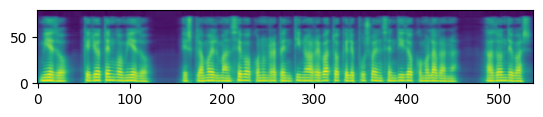

Modelo base 1:


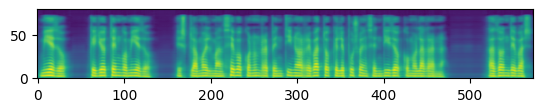

Modelo base 2:


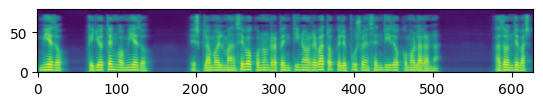

Modelo base 3:


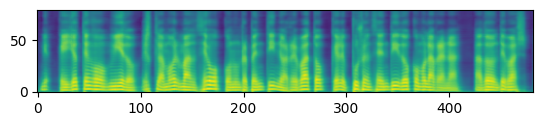

Modelo Finetuned FastPitch 1:


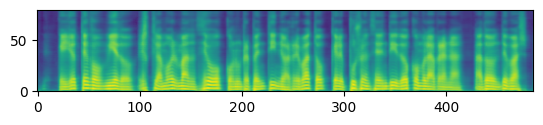

Modelo Finetuned FastPitch 2:


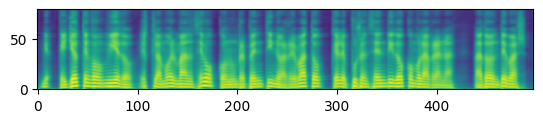

Modelo Finetuned FastPitch 3:


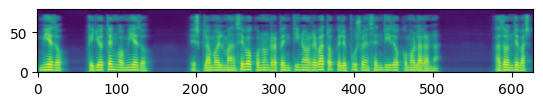

ES base model:


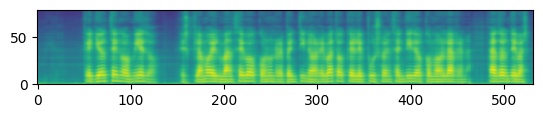

ES finetuned model:


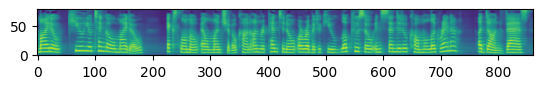

Pretrained EN model [tts_en_fastpitch]:


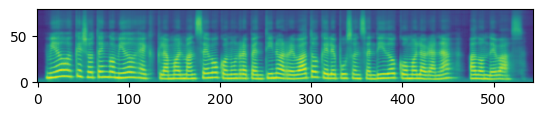

Pretrained ES_MULTISPEAKER model [tts_es_fastpitch_multispeaker]:


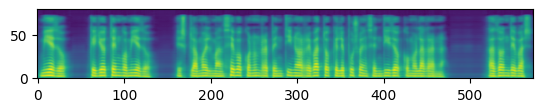

Trained (CSS10) Batch 8


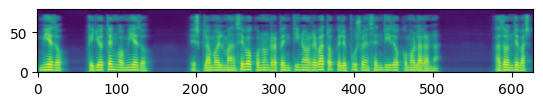

Trained (CSS10) Batch 12


In [ ]:
%matplotlib inline

# audio
print("original audio")
ipd.display(ipd.Audio(data_path+test_id+'.wav', rate=22050))

#Modelos base 1 2 y 3
audio_modelo_base_1, spectrogram_modelo_base_1 = evaluate_spec_fastpitch_ckpt(spec_gen_model_base1, vocoder_model, test)
audio_modelo_base_2, spectrogram_modelo_base_2 = evaluate_spec_fastpitch_ckpt(spec_gen_model_base2, vocoder_model, test)
audio_modelo_base_3, spectrogram_modelo_base_3 = evaluate_spec_fastpitch_ckpt(spec_gen_model_base3, vocoder_model, test)

#Modelos base 1 2 y 3
audio_modelo_Finetuned_FastPitch_1, spectrogram_Finetuned_FastPitch_1 = evaluate_spec_fastpitch_ckpt(spec_gen_model_Finetuned_FastPitch_1, vocoder_model, test)
audio_modelo_Finetuned_FastPitch_2, spectrogram_Finetuned_FastPitch_2 = evaluate_spec_fastpitch_ckpt(spec_gen_model_Finetuned_FastPitch_2, vocoder_model, test)
audio_modelo_Finetuned_FastPitch_3, spectrogram_Finetuned_FastPitch_3 = evaluate_spec_fastpitch_ckpt(spec_gen_model_Finetuned_FastPitch_3, vocoder_model, test)

audio_base, spectrogram_base = evaluate_spec_fastpitch_ckpt(spec_gen_model_base, vocoder_model, test)
audio_finetuned, spectrogram_finetuned = evaluate_spec_fastpitch_ckpt(spec_gen_model_finetuned, vocoder_model, test)
audio_p, spectrogram_p = evaluate_spec_fastpitch_ckpt(spec_gen_model_p, vocoder_model, test)
audio_e, spectrogram_e = evaluate_spec_fastpitch_ckpt(spec_gen_model_es, vocoder_model, test, speaker=1)
# audio_1, spectrogram_1 = evaluate_spec_fastpitch_ckpt(spec_gen_model_1, vocoder_model, test)
audio_2, spectrogram_2 = evaluate_spec_fastpitch_ckpt(spec_gen_model_2, vocoder_model, test)
audio_3, spectrogram_3 = evaluate_spec_fastpitch_ckpt(spec_gen_model_3, vocoder_model, test)

# visualize the spectrogram
if spectrogram_modelo_base_1 is not None:
    imshow(spectrogram_modelo_base_1, origin="lower")
    plt.show()
print("Modelo base 1:")
ipd.display(ipd.Audio(audio_modelo_base_1, rate=22050))

if spectrogram_modelo_base_2 is not None:
    imshow(spectrogram_modelo_base_2, origin="lower")
    plt.show()
print("Modelo base 2:")
ipd.display(ipd.Audio(audio_modelo_base_2, rate=22050))

if spectrogram_modelo_base_3 is not None:
    imshow(spectrogram_modelo_base_3, origin="lower")
    plt.show()
print("Modelo base 3:")
ipd.display(ipd.Audio(audio_modelo_base_3, rate=22050))

# visualize the spectrogram
if spectrogram_Finetuned_FastPitch_1 is not None:
    imshow(spectrogram_Finetuned_FastPitch_1, origin="lower")
    plt.show()
print("Modelo Finetuned FastPitch 1:")
ipd.display(ipd.Audio(audio_modelo_Finetuned_FastPitch_1, rate=22050))

# visualize the spectrogram
if spectrogram_Finetuned_FastPitch_2 is not None:
    imshow(spectrogram_Finetuned_FastPitch_2, origin="lower")
    plt.show()
print("Modelo Finetuned FastPitch 2:")
ipd.display(ipd.Audio(audio_modelo_Finetuned_FastPitch_2, rate=22050))

# visualize the spectrogram
if spectrogram_Finetuned_FastPitch_3 is not None:
    imshow(spectrogram_Finetuned_FastPitch_3, origin="lower")
    plt.show()
print("Modelo Finetuned FastPitch 3:")
ipd.display(ipd.Audio(audio_modelo_Finetuned_FastPitch_3, rate=22050))

if spectrogram_base is not None:
    imshow(spectrogram_base, origin="lower")
    plt.show()
print("ES base model:")
ipd.display(ipd.Audio(audio_base, rate=22050))

# visualize the spectrogram
if spectrogram_finetuned is not None:
    imshow(spectrogram_finetuned, origin="lower")
    plt.show()
print("ES finetuned model:")
ipd.display(ipd.Audio(audio_finetuned, rate=22050))

# visualize the spectrogram
if spectrogram_p is not None:
    imshow(spectrogram_p, origin="lower")
    plt.show()
print("Pretrained EN model [tts_en_fastpitch]:")
ipd.display(ipd.Audio(audio_p, rate=22050))

# visualize the spectrogram
if spectrogram_e is not None:
    imshow(spectrogram_e, origin="lower")
    plt.show()
print("Pretrained ES_MULTISPEAKER model [tts_es_fastpitch_multispeaker]:")
ipd.display(ipd.Audio(audio_e, rate=22050))

# # visualize the spectrogram
# if spectrogram_1 is not None:
#     imshow(spectrogram_1, origin="lower")
#     plt.show()
# print("Trained (CSS10) Batch 4")
# ipd.display(ipd.Audio(audio_1, rate=22050))

# # visualize the spectrogram
# if spectrogram_1 is not None:
#     imshow(spectrogram_1, origin="lower")
#     plt.show()
# print("Trained modelo finetuning profe Segovia")
# ipd.display(ipd.Audio(audio_1, rate=22050))

# visualize the spectrogram
if spectrogram_2 is not None:
    imshow(spectrogram_2, origin="lower")
    plt.show()
print("Trained (CSS10) Batch 8")
ipd.display(ipd.Audio(audio_2, rate=22050))

# visualize the spectrogram
if spectrogram_3 is not None:
    imshow(spectrogram_3, origin="lower")
    plt.show()
print("Trained (CSS10) Batch 12")
ipd.display(ipd.Audio(audio_3, rate=22050))

In [ ]:
import librosa
import soundfile as sf

Por último, guardamos los audios como audioOrig(número) y audioFinetuned(número)

In [ ]:
!mkdir muestrasModelosBase
!mkdir muestrasModelosFinetunedFastpitch
!mkdir muestrasEvaluaciónPerceptal

mkdir: cannot create directory ‘muestrasModelosBase’: File exists


In [ ]:
# # data, samplerate = sf.read('audio_finetuned.wav')
# sf.write('muestrasModelosBase/audio_modelo_base_1.wav', audio_modelo_base_1, 22050)
# sf.write('muestrasModelosBase/audio_modelo_base_2.wav', audio_modelo_base_2, 22050)
# sf.write('muestrasModelosBase/audio_modelo_base_3.wav', audio_modelo_base_3, 22050)
# sf.write('muestrasModelosFinetunedFastpitch/audio_modelo_Finetuned_FastPitch_1.wav', audio_modelo_Finetuned_FastPitch_1, 22050)
# sf.write('muestrasModelosFinetunedFastpitch/audio_modelo_Finetuned_FastPitch_2.wav', audio_modelo_Finetuned_FastPitch_2, 22050)
# sf.write('muestrasModelosFinetunedFastpitch/audio_modelo_Finetuned_FastPitch_3.wav', audio_modelo_Finetuned_FastPitch_3, 22050)
sf.write('muestrasEvaluaciónPerceptal/audio_modelo_Finetuned_FastPitch_2_Audio_1.wav', audio_modelo_Finetuned_FastPitch_2, 22050)


In [ ]:
audio = "/home/irene/datasets/datasetCastellanoReducido/19demarzo/19demarzo_3270.wav" # path to dataset folder with wav files from original dataset

# Save the first audio file (replace 'output_audio1.wav' with your desired output file name)
data, samplerate = sf.read(audio)
sf.write('muestrasModelosBase/audioOrigBase.wav', data, samplerate)

# Save the second audio file (replace 'output_audio2.wav' with your desired output file name)